In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

In [2]:
# Read Data Files
cardio_dataset_raw = pd.read_csv("../input/cardio_train.csv",sep=";")

print("Dataset memiliki " + str(len(cardio_dataset_raw)) + " baris dan " + str(len(cardio_dataset_raw.columns)) + " kolom")
print()
print(cardio_dataset_raw.head())

Dataset memiliki 70000 baris dan 13 kolom

   id    age  gender  height  weight   ...    gluc  smoke  alco  active  cardio
0   0  18393       2     168    62.0   ...       1      0     0       1       0
1   1  20228       1     156    85.0   ...       1      0     0       1       1
2   2  18857       1     165    64.0   ...       1      0     0       0       1
3   3  17623       2     169    82.0   ...       1      0     0       1       1
4   4  17474       1     156    56.0   ...       1      0     0       0       0

[5 rows x 13 columns]


In [3]:
# Cek semua deskripsi label pada dataset

for i in range(len(cardio_dataset_raw.columns)):
    print(cardio_dataset_raw[cardio_dataset_raw.columns[i]].describe())
    print()

count    70000.000000
mean     49972.419900
std      28851.302323
min          0.000000
25%      25006.750000
50%      50001.500000
75%      74889.250000
max      99999.000000
Name: id, dtype: float64

count    70000.000000
mean     19468.865814
std       2467.251667
min      10798.000000
25%      17664.000000
50%      19703.000000
75%      21327.000000
max      23713.000000
Name: age, dtype: float64

count    70000.000000
mean         1.349571
std          0.476838
min          1.000000
25%          1.000000
50%          1.000000
75%          2.000000
max          2.000000
Name: gender, dtype: float64

count    70000.000000
mean       164.359229
std          8.210126
min         55.000000
25%        159.000000
50%        165.000000
75%        170.000000
max        250.000000
Name: height, dtype: float64

count    70000.000000
mean        74.205690
std         14.395757
min         10.000000
25%         65.000000
50%         72.000000
75%         82.000000
max        200.000000
Name: w

In [4]:
# Cek semua label, lihat apakah terdapat NULL
for i in range(len(cardio_dataset_raw.columns)):
    print("Label " + cardio_dataset_raw.columns[i] + " memiliki " + str(cardio_dataset_raw[cardio_dataset_raw.columns[i]].isnull().sum()) + " data kosong")

Label id memiliki 0 data kosong
Label age memiliki 0 data kosong
Label gender memiliki 0 data kosong
Label height memiliki 0 data kosong
Label weight memiliki 0 data kosong
Label ap_hi memiliki 0 data kosong
Label ap_lo memiliki 0 data kosong
Label cholesterol memiliki 0 data kosong
Label gluc memiliki 0 data kosong
Label smoke memiliki 0 data kosong
Label alco memiliki 0 data kosong
Label active memiliki 0 data kosong
Label cardio memiliki 0 data kosong


In [5]:
# Cek data outlier pada setiap label menggunakan IQR (InterQuartile Range)

copy_of_cardio_dataset_raw = cardio_dataset_raw.copy()

# Menentukan label apa saja yang ingin dicek outliernya. Yang dicek hanyalah label yang bersifat numerical (bukan categorical maupun identifier)
check_outlier_column = ['age','height','weight','ap_hi','ap_lo']

row_with_outlier = []

# Cek IQR pada semua label
Q1 = copy_of_cardio_dataset_raw.quantile(0.25)
Q3 = copy_of_cardio_dataset_raw.quantile(0.75)

IQR = Q3 - Q1
rangeBawah = (Q1 - 1.5 * IQR) // 1
rangeAtas = (Q3 + 1.5 * IQR) // 1

for i in range(len(check_outlier_column)):
    countOutlier = 0
    for j in range(len(copy_of_cardio_dataset_raw)):
        
        #Cek apakah data lebih kecil dari Q1 - 1.5 * IQR
        if(copy_of_cardio_dataset_raw.loc[j][check_outlier_column[i]] < rangeBawah[check_outlier_column[i]]): 
            countOutlier = countOutlier + 1
            row_with_outlier.append(j)
        
        #Cek apakah data lebih besar dari Q3 + 1.5 * IQR
        elif(copy_of_cardio_dataset_raw.loc[j][check_outlier_column[i]] > rangeAtas[check_outlier_column[i]]):
            countOutlier = countOutlier + 1
            row_with_outlier.append(j)
            
    print("Label " + check_outlier_column[i] + " memiliki " + str(countOutlier) + " data outlier")

Label age memiliki 4 data outlier
Label height memiliki 490 data outlier
Label weight memiliki 1810 data outlier
Label ap_hi memiliki 1435 data outlier
Label ap_lo memiliki 4632 data outlier


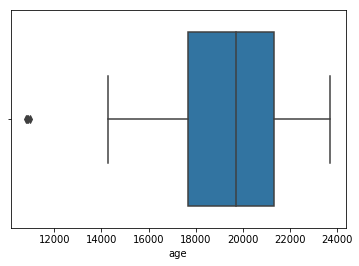

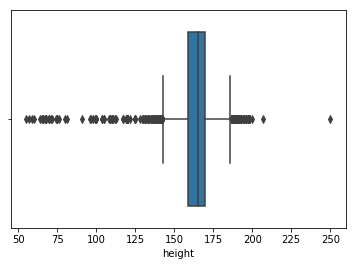

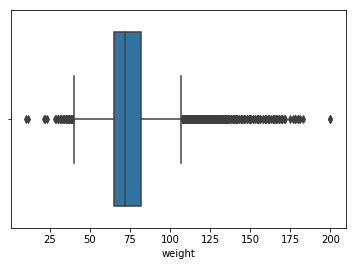

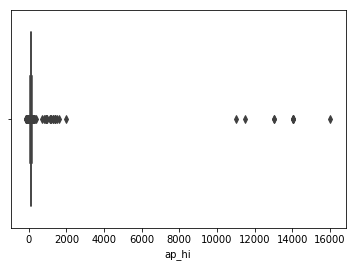

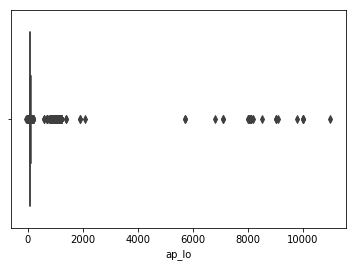

In [6]:
# Cek outlier menggunakan boxplot
import seaborn as sns
import matplotlib.pyplot as plt
for col in check_outlier_column:
    sns.boxplot(x=copy_of_cardio_dataset_raw[col])
    plt.show()

In [7]:
# Cek row yang memiliki outlier, hapus row duplikasi, kemudian sort row dari terbesar ke terkecil
row_with_outlier = list(dict.fromkeys(row_with_outlier))

# Sort row dari terbesar ke terkecil
for i in range(len(row_with_outlier)):
    swap = i + np.argmax(row_with_outlier[i:])
    (row_with_outlier[i], row_with_outlier[swap]) = (row_with_outlier[swap], row_with_outlier[i])

print(row_with_outlier)


[69997, 69996, 69981, 69978, 69967, 69947, 69946, 69937, 69932, 69929, 69922, 69894, 69885, 69878, 69877, 69873, 69872, 69863, 69854, 69851, 69841, 69830, 69827, 69823, 69784, 69771, 69719, 69708, 69699, 69673, 69668, 69638, 69635, 69631, 69622, 69595, 69593, 69589, 69587, 69586, 69579, 69571, 69552, 69549, 69545, 69532, 69511, 69504, 69490, 69487, 69480, 69475, 69440, 69434, 69430, 69429, 69422, 69405, 69390, 69378, 69370, 69360, 69355, 69329, 69320, 69319, 69313, 69306, 69303, 69302, 69295, 69291, 69287, 69286, 69282, 69274, 69265, 69255, 69233, 69217, 69216, 69205, 69197, 69162, 69158, 69137, 69124, 69122, 69116, 69115, 69109, 69105, 69101, 69081, 69076, 69069, 69067, 69063, 69060, 69053, 69052, 69023, 69012, 68998, 68987, 68971, 68967, 68958, 68957, 68956, 68943, 68933, 68921, 68917, 68900, 68895, 68888, 68885, 68872, 68842, 68835, 68826, 68821, 68814, 68796, 68780, 68776, 68758, 68753, 68745, 68744, 68742, 68741, 68737, 68716, 68706, 68699, 68694, 68688, 68669, 68668, 68667, 68665

In [8]:
cleaned_cardio_dataset = copy_of_cardio_dataset_raw.copy().drop(row_with_outlier, axis=0)

print("Dataset memiliki " + str(len(cleaned_cardio_dataset)) + " baris dan " + str(len(cleaned_cardio_dataset.columns)) + " kolom")
print()
print(cleaned_cardio_dataset.head(5))

Dataset memiliki 62532 baris dan 13 kolom

   id    age  gender  height  weight   ...    gluc  smoke  alco  active  cardio
0   0  18393       2     168    62.0   ...       1      0     0       1       0
1   1  20228       1     156    85.0   ...       1      0     0       1       1
2   2  18857       1     165    64.0   ...       1      0     0       0       1
3   3  17623       2     169    82.0   ...       1      0     0       1       1
5   8  21914       1     151    67.0   ...       2      0     0       0       0

[5 rows x 13 columns]


<function matplotlib.pyplot.show(*args, **kw)>

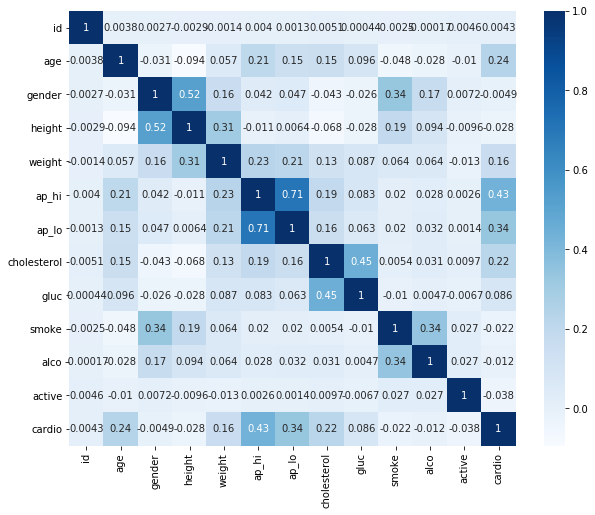

In [11]:
sns.heatmap(cleaned_cardio_dataset.corr(),annot=True,cmap='Blues')
fig=plt.gcf()
fig.set_size_inches(10,8)
plt.show